In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [36]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [37]:
q = "SELECT MIN(population), MAX(population), "\
"MIN(population_growth), MAX(population_growth) "\
"FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [38]:
q = "SELECT name, MIN(population) FROM facts"
pd.read_sql_query(q, conn)

,name,MIN(population)
0,Antarctica,0


In [39]:
q = "SELECT name, MAX(population) FROM facts"
pd.read_sql_query(q, conn)

,name,MAX(population)
0,World,7256490011


The max and minimum here are the total population of the world and a region that is not really inhabited. These are not relevant statistics for the data.

In [43]:
q = "SELECT name, population, population_growth, "\
"birth_rate, death_rate FROM facts "\
"WHERE name NOT IN ('Antarctica', 'World')"
countries = pd.read_sql_query(q, conn)
countries

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Albania,3029278.0,0.30,12.92,6.58
2,Algeria,39542166.0,1.84,23.67,4.31
3,Andorra,85580.0,0.12,8.13,6.96
4,Angola,19625353.0,2.78,38.78,11.49
5,Antigua and Barbuda,92436.0,1.24,15.85,5.69
6,Argentina,43431886.0,0.93,16.64,7.33
7,Armenia,3056382.0,0.15,13.61,9.34
8,Australia,22751014.0,1.07,12.15,7.14
9,Austria,8665550.0,0.55,9.41,9.42


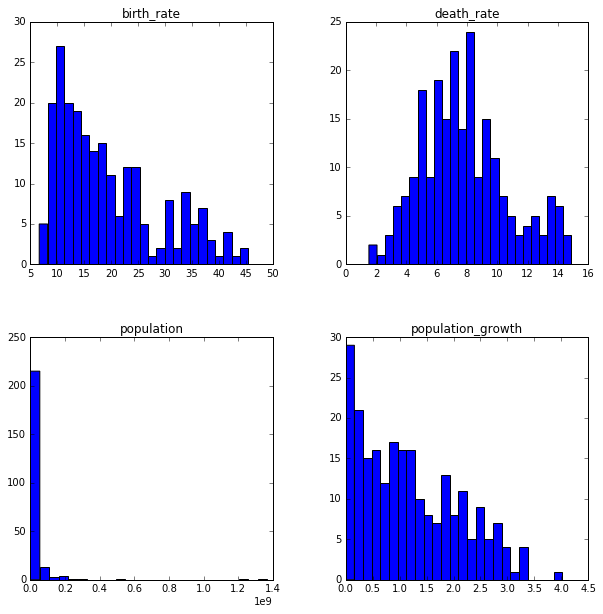

In [53]:
ax = countries.hist(['population',
                     'population_growth',
                     'birth_rate',
                     'death_rate'],
                    bins = 25,
                    grid=False,
                    figsize=(10,10),
                    layout=(2,2))